In [2]:
import os
from multiprocessing import Pool
import matplotlib.pyplot as plt

import random
import numpy as np
import torch

from src.environments import SourceChannelCodingEnv
from src.utils import Discretizer
from src.agents.dqn import DFHqn, Dqn
from src.agents.fhtlr import FHMaxTlr, FHTlr
from src.agents.ql import QLearning, FHQLearning
from src.agents.bf import FHLinear
from src.agents.rbf import FHRBF
from src.trainer import run_experiment



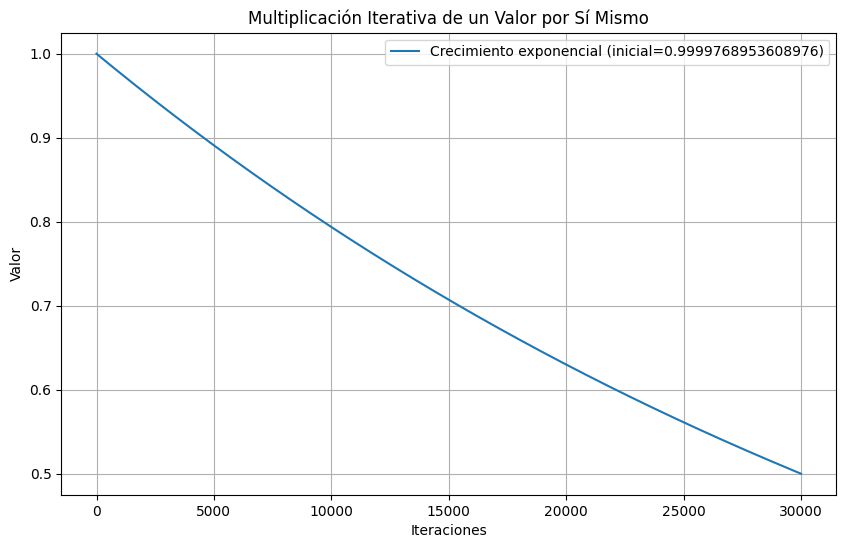

In [6]:
import matplotlib.pyplot as plt

def plot_exponential_growth(initial_value, iterations):
    """
    Multiplica un valor inicial por sí mismo iterativamente y grafica la curva.
    
    Args:
        initial_value (float): Valor inicial (ej. 1.01).
        iterations (int): Número de iteraciones (ej. 100).
    """
    values = [initial_value]
    
    for _ in range(iterations):
        new_value = values[-1] * initial_value
        values.append(new_value)
    
    plt.figure(figsize=(10, 6))
    plt.plot(values, label=f'Crecimiento exponencial (inicial={initial_value})')
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor')
    plt.title('Multiplicación Iterativa de un Valor por Sí Mismo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso:
iterations = 30_000
initial_value = np.exp(np.log(0.5) / iterations)
plot_exponential_growth(initial_value, iterations)

Initialitation

In [2]:
GAMMA = 0.8
H = 4
C = 4
Max_bits = 100.0

DISCRETIZER = Discretizer(
    min_points_states=[0, 0, 0, 0, 0],
    max_points_states=[Max_bits, 4, 4, 4, 4],
    bucket_states=[20, 10, 10, 10, 10],
    min_points_actions=[0, 0, 0, 0, 0],
    max_points_actions=[1, 1, 1, 1, 1],
    bucket_actions=[10, 10, 10, 10, 10],
)

N_EXPS = 100
EPISODES = 10
BUFFER_SIZE = 1_000
BUFFER_SIZE_TLR = 5
ALPHA_DQN = 0.01
ALPHA_FHRBF = 0.1
ALPHA_LINEAR = 0.1

ALPHA_FHTLR = 0.005
ALPHA_FHTLR_MAX = 0.01

ALPHA_FHTLR_MAX_ER = 0.01
ALPHA_FHTLR_ER = 0.005

ALPHA_QL = 10
K = 15
SCALE = 0.5
W_DECAY = 0.0
EPS_DECAY = (0.99995)**(30_000/EPISODES)


def generate_env():
    env = SourceChannelCodingEnv(
        T=H, 
        K=C, 
        data_initial=Max_bits, 
        rho=0.9, 
        sigma=0.2, 
        beta_success=2.0
    )
    return env

def run_experiment_with_agent(agent_name, n_exp):
    random.seed(n_exp)
    np.random.seed(n_exp)
    torch.manual_seed(n_exp)
    if agent_name == 'dqn':
        agent = Dqn(DISCRETIZER, ALPHA_DQN, GAMMA, BUFFER_SIZE)
    if agent_name == 'dfhqn':
        agent = DFHqn(DISCRETIZER, ALPHA_DQN, H, BUFFER_SIZE)
    if agent_name == "fhtlr_max":
        agent = FHMaxTlr(DISCRETIZER, ALPHA_FHTLR_MAX, H, K, SCALE, w_decay=W_DECAY, buffer_size=1)
    if agent_name == "fhtlr_true":
        agent = FHTlr(DISCRETIZER, ALPHA_FHTLR, H, K, SCALE, w_decay=W_DECAY, buffer_size=1)
    if agent_name == "fhtlr_max_er":
        agent = FHMaxTlr(DISCRETIZER, ALPHA_FHTLR_MAX_ER, H, K, SCALE, w_decay=W_DECAY, buffer_size=BUFFER_SIZE_TLR)
    if agent_name == "fhtlr_true_er":
        agent = FHTlr(DISCRETIZER, ALPHA_FHTLR_ER, H, K, SCALE, w_decay=W_DECAY, buffer_size=BUFFER_SIZE_TLR)
    if agent_name == "fhql":
        agent = FHQLearning(DISCRETIZER, ALPHA_QL, H, 0.1, 1)
    if agent_name == "fhbf":
        agent = FHLinear(DISCRETIZER, ALPHA_LINEAR, H, BUFFER_SIZE)
    if agent_name == "fhrbf":
        agent = FHRBF(DISCRETIZER, ALPHA_FHRBF, H, BUFFER_SIZE)
    if agent_name == "ql":
        agent = QLearning(DISCRETIZER, ALPHA_LINEAR,0.99)
    
    Gs  = run_experiment( n=n_exp,E=EPISODES, H=H, eps=1.0, eps_decay=EPS_DECAY, env=generate_env(), agent=agent)                               
    return Gs

 Episodio: 19999/20000

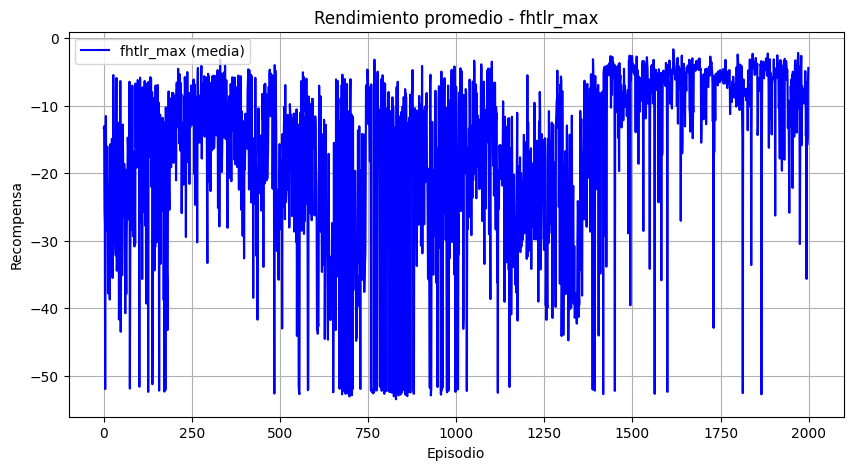

In [ ]:
k=20
alpha = 0.2

 Episodio: 39999/40000

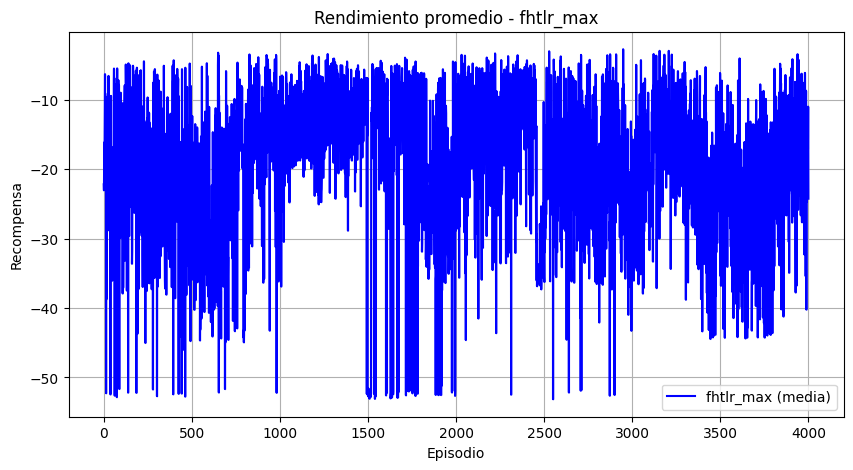

In [ ]:
k=15
alpha = 0.15

 Episodio: 29999/30000

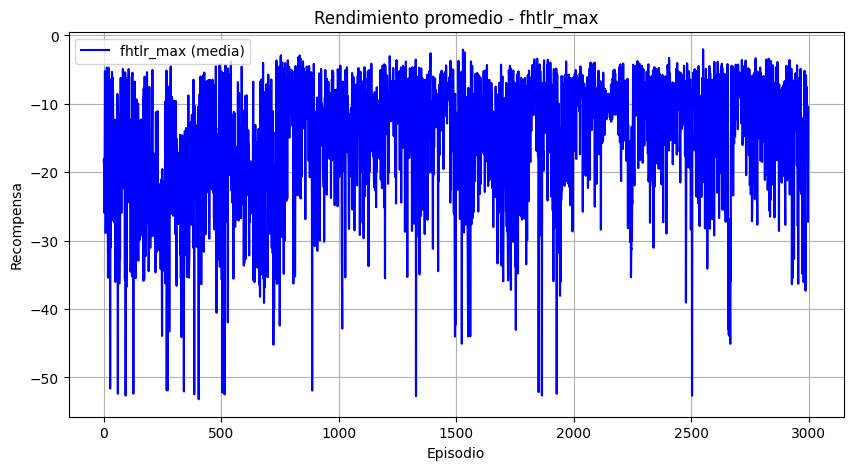

In [ ]:
k = 15
alpha = 0.1

 Episodio: 19999/20000

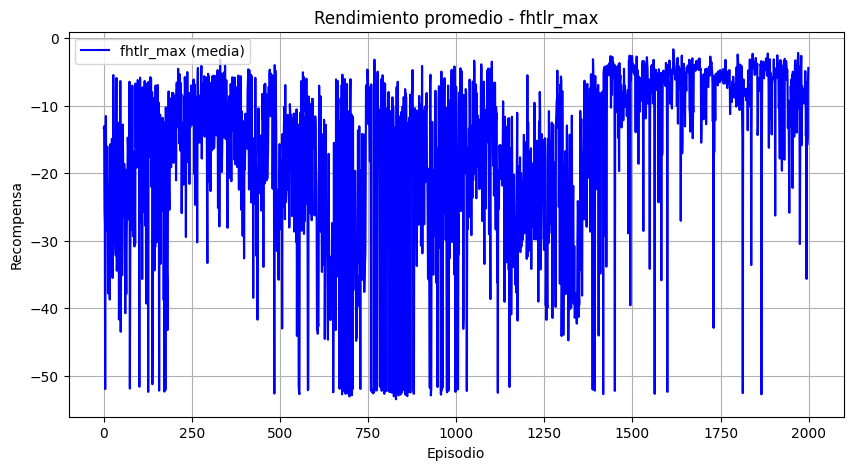

In [ ]:
K=20
ALPHA=0.2

 Episodio: 19999/20000

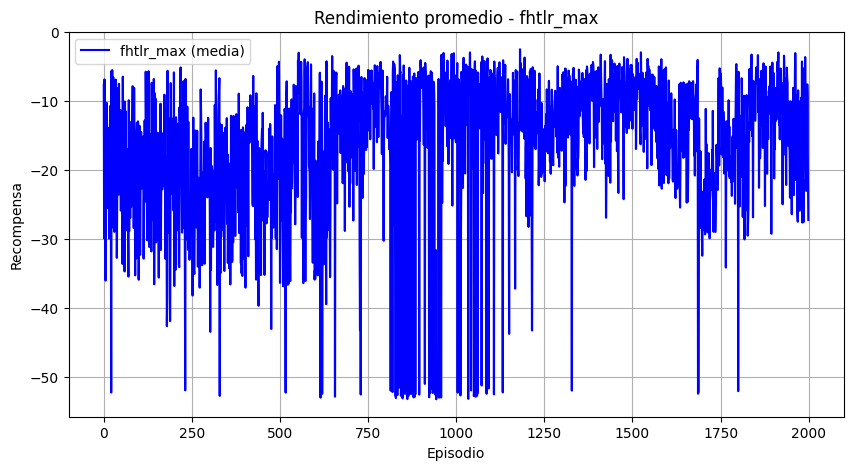

In [ ]:
k=20
alpha = 0.1

 Episodio: 19999/20000

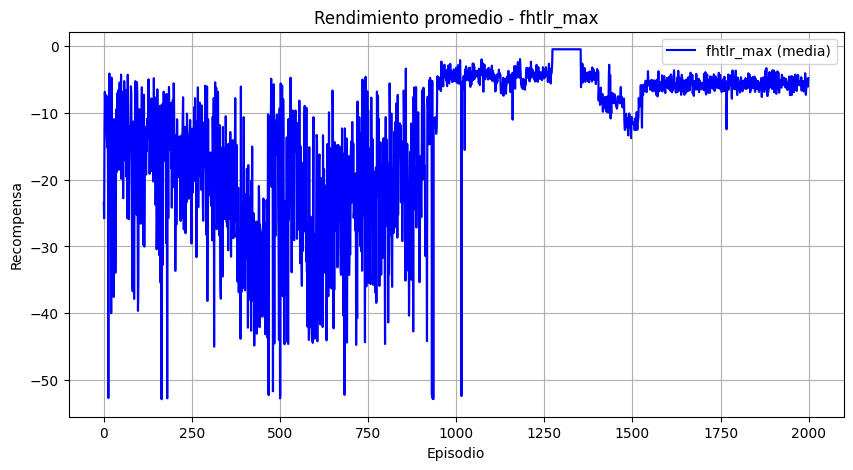

In [ ]:
k=15
alpha = 0.2

 Episodio: 9999/10000

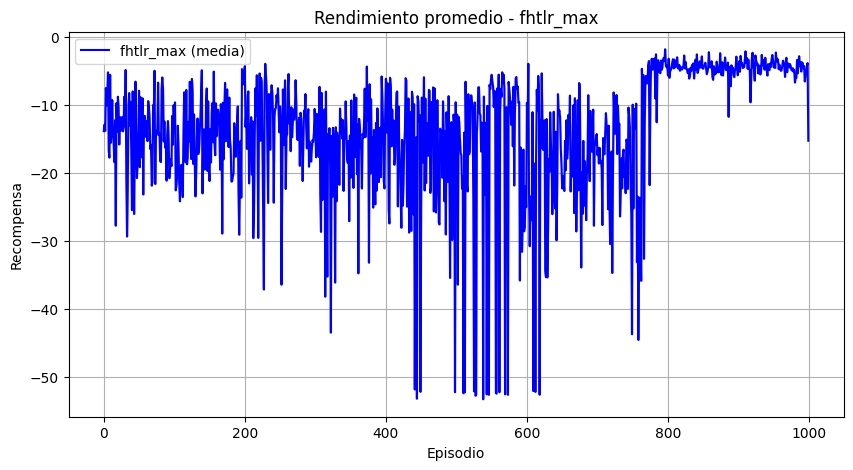

In [ ]:
k=15
alpha = 0.5